In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import wget

url = "https://raw.githubusercontent.com/LCAV/pyroomacoustics/master/examples/data/INRIA_MUSIS.stl"
mesh_url = "../tmp/INRIA_MUSIS.stl"

from pathlib import Path
if not Path(mesh_url).is_file():
    print(f"download data to {mesh_url}")
    wget.download(url, mesh_url)
else:
    print("data already downloaded")

download data to ../tmp/INRIA_MUSIS.stl


In [10]:
import src.dmcp_workflow.capture_depth as cd

dm, Kdm, Pdm = cd.generate_depth_map(mesh_url)

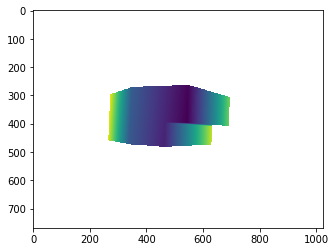

In [15]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("TKAgg")

plt.imshow(dm)

In [18]:
import src.dmcp_workflow.annotate_points as ap
cps = ap.annotate(dm, dm)

In [19]:
cps

array([[547.28494624, 393.25483871, 544.53225806, 389.12580645],
       [683.54301075, 400.13655914, 683.54301075, 401.51290323],
       [545.90860215, 268.00752688, 551.41397849, 265.25483871],
       [695.93010753, 305.1688172 , 694.55376344, 309.29784946],
       [471.58602151, 477.21182796, 466.08064516, 477.21182796],
       [629.8655914 , 471.70645161, 631.24193548, 471.70645161],
       [350.46774194, 270.76021505, 343.58602151, 276.2655914 ],
       [353.22043011, 470.33010753, 339.45698925, 468.95376344],
       [274.7688172 , 295.5344086 , 276.14516129, 295.5344086 ],
       [269.26344086, 455.19032258, 269.26344086, 459.31935484]])

In [24]:
import src.pycv.dmcp as dmcp

world_points = dmcp.dm_to_world(dm, Kdm,Pdm,cps[:,2:])
A = dmcp.dmcp(Kdm, Pdm, cps[:,:2], world_points)

In [26]:
import numpy as np
with np.printoptions(formatter={'float':lambda x: f"{x:5.02f}"}):
    print(f"Transform\n{A}")

Transform
[[ 1.00  0.01 -0.01 73.90]
 [-0.01  1.00 -0.01 119.60]
 [ 0.01  0.01  1.00 -36.15]
 [ 0.00  0.00  0.00  1.00]]
